<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*This notebook has been modified from the original notebook available online, as detailed next.*

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).

# Visualization with Seaborn

Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired.
There are several valid complaints about Matplotlib that often come up:

- Prior to version 2.0, Matplotlib's defaults are not exactly the best choices. It was based on MATLAB circa 1999, and this often shows.
- Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a *lot* of boilerplate code.
- **Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas ``DataFrame``s.** In order to visualize data from a Pandas ``DataFrame``, you must extract each ``Series`` and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the ``DataFrame`` labels in a plot.

An answer to these problems is [Seaborn](http://seaborn.pydata.org/). Seaborn provides **an API on top of Matplotlib** that offers sane choices for plot style and color defaults, defines simple **high-level functions for common statistical plot types**, and **integrates with the functionality provided by Pandas ``DataFrame``s.**

To be fair, the Matplotlib team is addressing this: it has recently added the ``plt.style``, and is starting to handle Pandas data more seamlessly.
The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo.
But for all the reasons just discussed, **Seaborn remains an extremely useful addon.**

## Seaborn Versus Matplotlib

Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.
We start with the typical imports:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Now we create some random walk data:

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)

# generating 6 sets of y values with rng
y = np.cumsum(rng.randn(500, 6), 0)

And do a simple plot:

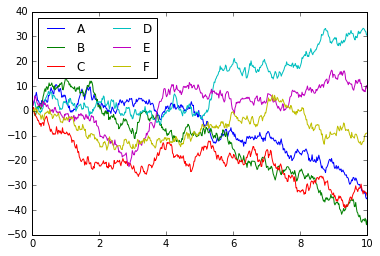

In [3]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Although the result contains all the information we'd like it to convey, it does so in a way that is **not all that aesthetically pleasing, and even looks a bit old-fashioned** in the context of 21st-century data visualization.

Now let's take a look at how it works with Seaborn.
As we will see, **Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output**.

We can set the style by calling Seaborn's ``set()`` method.
By convention, Seaborn is imported as ``sns``:

In [4]:
import seaborn as sns

# setting the style to a default
sns.set()

Now let's rerun the same two lines as before:

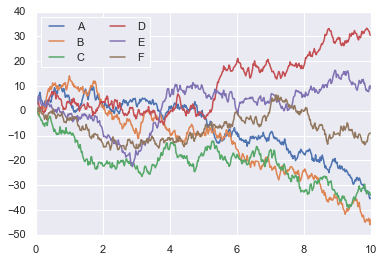

In [5]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Ah, much better!

## Exploring Seaborn Plots

The main idea of Seaborn is that it provides high-level commands to create a **variety of plot types useful for statistical data exploration**, and even some statistical **model fitting**.

Let's take a look at a few of the datasets and plot types available in Seaborn. Note that all of the following *could* be done using raw Matplotlib commands (this is, in fact, what Seaborn does under the hood) but the **Seaborn API is much more convenient**.

### Pair plots

When you generalize joint plots to datasets of larger dimensions, you end up with **pair plots**. This is very useful for **exploring correlations between multidimensional data**, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known **Iris dataset**, which lists measurements of petals and sepals of three iris species:

In [6]:
iris = sns.load_dataset("iris")

# three species in the dataset
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Visualizing the multidimensional relationships among the samples is as easy as calling ``sns.pairplot``:

C:\Users\ALiotta\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


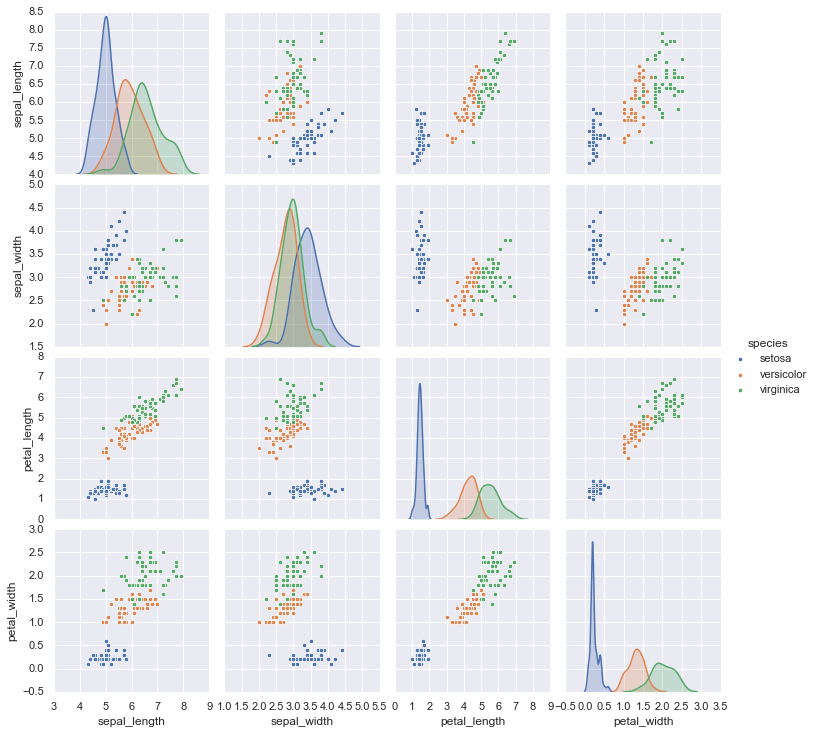

In [7]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

Sometimes the best way to view data is via histograms of subsets. Seaborn's ``FacetGrid`` makes this extremely simple.
We'll take a look at some data that shows the amount that restaurant staff receive in tips based on various indicator data:

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


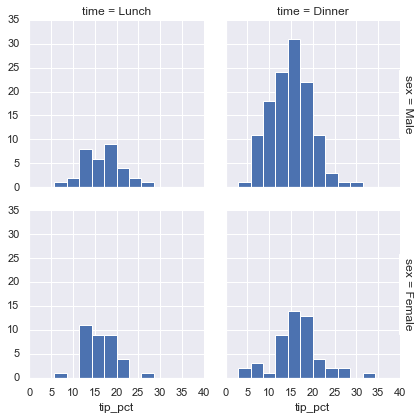

In [9]:
# computes the tip as a percentage of the bill
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

# creating the grid
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)

# plotting the histograms
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor plots

Factor plots can be useful for this kind of visualization as well. This allows you to view the distribution of a parameter within bins defined by any other parameter:

C:\Users\ALiotta\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


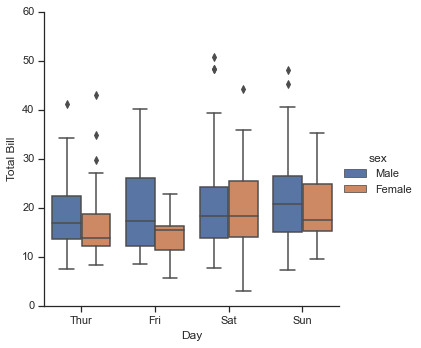

In [10]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Joint distributions

Similar to the pairplot we saw earlier, we can use ``sns.jointplot`` to show the joint distribution between different datasets, along with the associated marginal distributions:

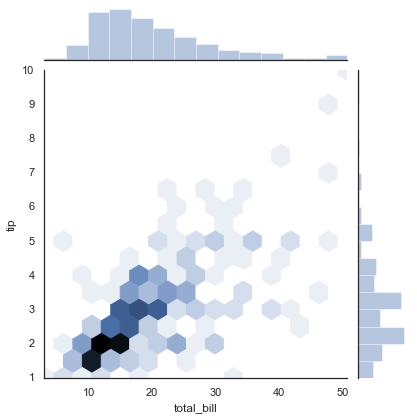

In [11]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

The joint plot can even do some automatic **kernel density** estimation and **regression**:

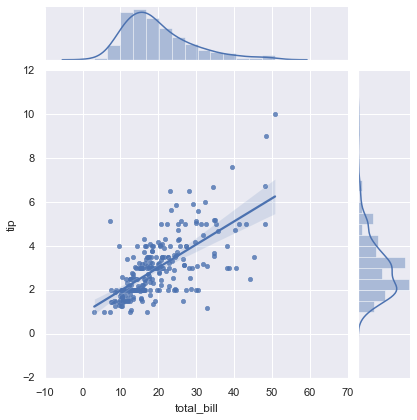

In [12]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Bar plots

Time series can be plotted using ``sns.factorplot``. In the following example, we'll use the Planets data.

In [13]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\ALiotta\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


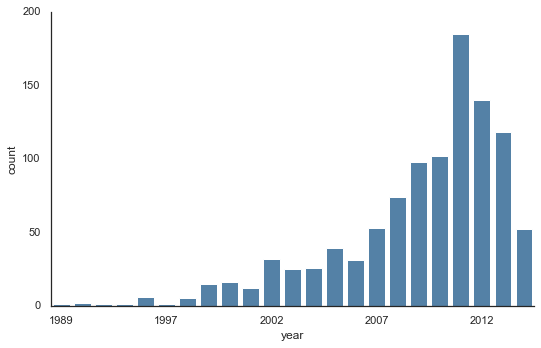

In [14]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=1.5,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

We can learn more by looking at the *method* of discovery of each of these planets:

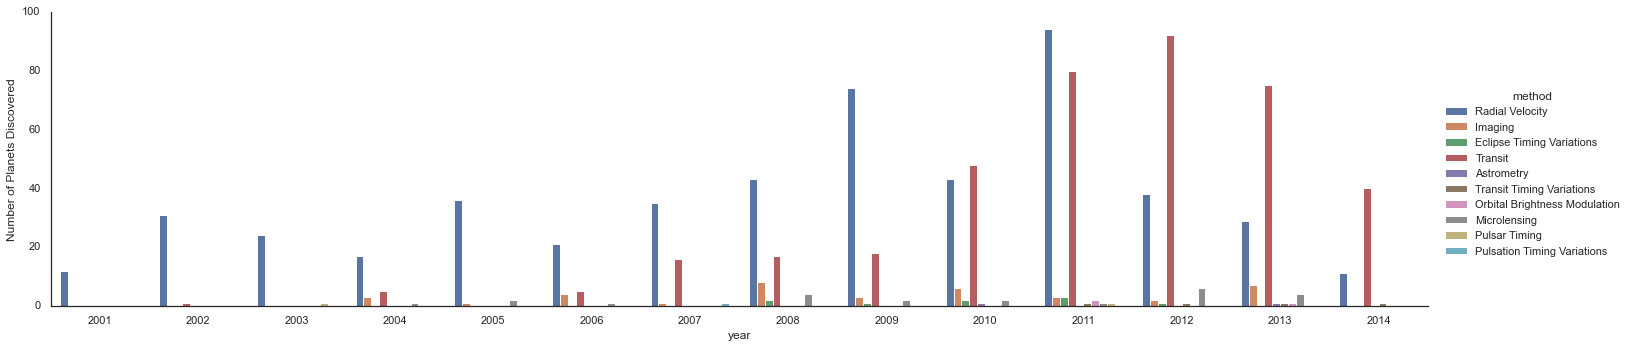

In [15]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

## More about seaboarn

Check out what else you can do with Seaborn: [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), and [tutorial](http://seaborn.pydata.org/
tutorial.htm).
